In [1]:
import matplotlib.pyplot as m
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy import stats
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import datetime as dt

In [2]:
data = pd.read_csv("C:\\Users\\sidd7\\Downloads\\NIFTY 50.csv")
data.head()

,date,close,high,low,open,volume
0,2015-01-09 09:15:00+05:30,8301.20,8301.30,8285.45,8285.45,0
1,2015-01-09 09:20:00+05:30,8301.00,8303.00,8293.25,8300.50,0
2,2015-01-09 09:25:00+05:30,8294.15,8302.55,8286.80,8301.65,0
3,2015-01-09 09:30:00+05:30,8288.50,8295.75,8280.65,8294.10,0
4,2015-01-09 09:35:00+05:30,8283.45,8290.45,8278.00,8289.10,0


In [3]:
data['date'] = pd.to_datetime(data['date'])
data['date1'] = data['date'].dt.date
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['time'] = data['date'].dt.time
data.head()

,date,close,high,low,open,volume,date1,year,month,day,time
0,2015-01-09 09:15:00+05:30,8301.20,8301.30,8285.45,8285.45,0,2015-01-09,2015,1,9,09:15:00
1,2015-01-09 09:20:00+05:30,8301.00,8303.00,8293.25,8300.50,0,2015-01-09,2015,1,9,09:20:00
2,2015-01-09 09:25:00+05:30,8294.15,8302.55,8286.80,8301.65,0,2015-01-09,2015,1,9,09:25:00
3,2015-01-09 09:30:00+05:30,8288.50,8295.75,8280.65,8294.10,0,2015-01-09,2015,1,9,09:30:00
4,2015-01-09 09:35:00+05:30,8283.45,8290.45,8278.00,8289.10,0,2015-01-09,2015,1,9,09:35:00


In [4]:
bull = data.copy()
bull = bull.drop(['volume', 'year','month','day','time'], axis = 1)

In [5]:
bull = bull.reset_index()
bull

,index,date,close,high,low,open,date1
0,0,2015-01-09 09:15:00+05:30,8301.20,8301.30,8285.45,8285.45,2015-01-09
1,1,2015-01-09 09:20:00+05:30,8301.00,8303.00,8293.25,8300.50,2015-01-09
2,2,2015-01-09 09:25:00+05:30,8294.15,8302.55,8286.80,8301.65,2015-01-09
3,3,2015-01-09 09:30:00+05:30,8288.50,8295.75,8280.65,8294.10,2015-01-09
4,4,2015-01-09 09:35:00+05:30,8283.45,8290.45,8278.00,8289.10,2015-01-09
...,...,...,...,...,...,...,...
136197,136197,2022-10-21 15:05:00+05:30,17577.60,17577.95,17562.35,17562.35,2022-10-21
136198,136198,2022-10-21 15:10:00+05:30,17571.00,17580.95,17570.10,17578.00,2022-10-21
136199,136199,2022-10-21 15:15:00+05:30,17579.45,17581.00,17570.75,17571.35,2022-10-21
136200,136200,2022-10-21 15:20:00+05:30,17595.20,17595.20,17576.75,17579.40,2022-10-21


In [6]:
bull['size_of_candle'] = bull['close'] - bull['open']
bull.head(17)

,index,date,close,high,low,open,date1,size_of_candle
0,0,2015-01-09 09:15:00+05:30,8301.20,8301.30,8285.45,8285.45,2015-01-09,15.75
1,1,2015-01-09 09:20:00+05:30,8301.00,8303.00,8293.25,8300.50,2015-01-09,0.50
2,2,2015-01-09 09:25:00+05:30,8294.15,8302.55,8286.80,8301.65,2015-01-09,-7.50
3,3,2015-01-09 09:30:00+05:30,8288.50,8295.75,8280.65,8294.10,2015-01-09,-5.60
4,4,2015-01-09 09:35:00+05:30,8283.45,8290.45,8278.00,8289.10,2015-01-09,-5.65
5,5,2015-01-09 09:40:00+05:30,8285.55,8288.30,8277.40,8283.40,2015-01-09,2.15
6,6,2015-01-09 09:45:00+05:30,8283.75,8287.65,8278.05,8285.40,2015-01-09,-1.65
7,7,2015-01-09 09:50:00+05:30,8276.25,8284.25,8273.95,8283.80,2015-01-09,-7.55
8,8,2015-01-09 09:55:00+05:30,8282.00,8283.60,8275.05,8275.95,2015-01-09,6.05
9,9,2015-01-09 10:00:00+05:30,8285.50,8287.35,8281.70,8281.80,2015-01-09,3.70


In [7]:
check = []
for i in bull['size_of_candle']:
    if i >0:
        check.append(True)
    if i < 0:
        check.append(False)
    if i == 0:
        check.append('null')
len(check)

136202

In [8]:
bull['is_bullish'] = check
bull

,index,date,close,high,low,open,date1,size_of_candle,is_bullish
0,0,2015-01-09 09:15:00+05:30,8301.20,8301.30,8285.45,8285.45,2015-01-09,15.75,True
1,1,2015-01-09 09:20:00+05:30,8301.00,8303.00,8293.25,8300.50,2015-01-09,0.50,True
2,2,2015-01-09 09:25:00+05:30,8294.15,8302.55,8286.80,8301.65,2015-01-09,-7.50,False
3,3,2015-01-09 09:30:00+05:30,8288.50,8295.75,8280.65,8294.10,2015-01-09,-5.60,False
4,4,2015-01-09 09:35:00+05:30,8283.45,8290.45,8278.00,8289.10,2015-01-09,-5.65,False
...,...,...,...,...,...,...,...,...,...
136197,136197,2022-10-21 15:05:00+05:30,17577.60,17577.95,17562.35,17562.35,2022-10-21,15.25,True
136198,136198,2022-10-21 15:10:00+05:30,17571.00,17580.95,17570.10,17578.00,2022-10-21,-7.00,False
136199,136199,2022-10-21 15:15:00+05:30,17579.45,17581.00,17570.75,17571.35,2022-10-21,8.10,True
136200,136200,2022-10-21 15:20:00+05:30,17595.20,17595.20,17576.75,17579.40,2022-10-21,15.80,True


In [9]:
#13195
bullish_engulfing = []
for i in range(136000):
    if(bull['is_bullish'][i] == False) and (bull['is_bullish'][i+1] == True) and (bull['date1'][i] == bull['date1'][i+1]) and (bull['close'][i+1] > bull['open'][i]) and (bull['open'][i+1] < bull['close'][i]):
        lst = [bull['index'][i],bull['index'][i+1],bull['index'][i+2],bull['index'][i+3],bull['index'][i+4]]
        bullish_engulfing.append(lst)

In [10]:
bullish_engulfing

[[30, 31, 32, 33, 34],
 [45, 46, 47, 48, 49],
 [59, 60, 61, 62, 63],
 [72, 73, 74, 75, 76],
 [81, 82, 83, 84, 85],
 [85, 86, 87, 88, 89],
 [125, 126, 127, 128, 129],
 [131, 132, 133, 134, 135],
 [142, 143, 144, 145, 146],
 [146, 147, 148, 149, 150],
 [165, 166, 167, 168, 169],
 [192, 193, 194, 195, 196],
 [227, 228, 229, 230, 231],
 [302, 303, 304, 305, 306],
 [312, 313, 314, 315, 316],
 [317, 318, 319, 320, 321],
 [326, 327, 328, 329, 330],
 [336, 337, 338, 339, 340],
 [338, 339, 340, 341, 342],
 [364, 365, 366, 367, 368],
 [381, 382, 383, 384, 385],
 [391, 392, 393, 394, 395],
 [411, 412, 413, 414, 415],
 [437, 438, 439, 440, 441],
 [445, 446, 447, 448, 449],
 [457, 458, 459, 460, 461],
 [464, 465, 466, 467, 468],
 [477, 478, 479, 480, 481],
 [482, 483, 484, 485, 486],
 [497, 498, 499, 500, 501],
 [502, 503, 504, 505, 506],
 [530, 531, 532, 533, 534],
 [563, 564, 565, 566, 567],
 [573, 574, 575, 576, 577],
 [600, 601, 602, 603, 604],
 [608, 609, 610, 611, 612],
 [611, 612, 613, 614, 

In [12]:
for i in range(len(bullish_engulfing)-1):
    for j in bullish_engulfing[i]:
        if j in bullish_engulfing[i+1]:
            bullish_engulfing.pop(i+1)

In [13]:
bullish_engulfing1 = []
for i in bullish_engulfing:
    for j in i:
        bullish_engulfing1.append(j)

In [14]:
bullish_engulfing1

[30,
 31,
 32,
 33,
 34,
 45,
 46,
 47,
 48,
 49,
 59,
 60,
 61,
 62,
 63,
 72,
 73,
 74,
 75,
 76,
 81,
 82,
 83,
 84,
 85,
 125,
 126,
 127,
 128,
 129,
 131,
 132,
 133,
 134,
 135,
 142,
 143,
 144,
 145,
 146,
 165,
 166,
 167,
 168,
 169,
 192,
 193,
 194,
 195,
 196,
 227,
 228,
 229,
 230,
 231,
 302,
 303,
 304,
 305,
 306,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 326,
 327,
 328,
 329,
 330,
 336,
 337,
 338,
 339,
 340,
 364,
 365,
 366,
 367,
 368,
 381,
 382,
 383,
 384,
 385,
 391,
 392,
 393,
 394,
 395,
 411,
 412,
 413,
 414,
 415,
 437,
 438,
 439,
 440,
 441,
 445,
 446,
 447,
 448,
 449,
 457,
 458,
 459,
 460,
 461,
 464,
 465,
 466,
 467,
 468,
 477,
 478,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 486,
 497,
 498,
 499,
 500,
 501,
 502,
 503,
 504,
 505,
 506,
 530,
 531,
 532,
 533,
 534,
 563,
 564,
 565,
 566,
 567,
 573,
 574,
 575,
 576,
 577,
 600,
 601,
 602,
 603,
 604,
 608,
 609,
 610,
 611,
 612,
 623,
 624,
 625,
 626,
 627,
 637,

In [15]:
bull_df = bull[bull['index'].isin(bullish_engulfing1)]
bull_df.to_csv("bull_df.csv")


In [16]:
bull_df

,index,date,close,high,low,open,date1,size_of_candle,is_bullish
30,30,2015-01-09 11:45:00+05:30,8254.80,8260.70,8253.30,8255.95,2015-01-09,-1.15,False
31,31,2015-01-09 11:50:00+05:30,8257.65,8257.65,8254.15,8254.70,2015-01-09,2.95,True
32,32,2015-01-09 11:55:00+05:30,8259.10,8260.25,8257.15,8257.30,2015-01-09,1.80,True
33,33,2015-01-09 12:00:00+05:30,8211.50,8260.30,8211.20,8259.20,2015-01-09,-47.70,False
34,34,2015-01-09 12:05:00+05:30,8211.85,8226.00,8191.10,8211.15,2015-01-09,0.70,True
...,...,...,...,...,...,...,...,...,...
135999,135999,2022-10-19 11:05:00+05:30,17566.20,17577.05,17564.25,17569.75,2022-10-19,-3.55,False
136000,136000,2022-10-19 11:10:00+05:30,17579.35,17580.85,17562.15,17565.70,2022-10-19,13.65,True
136001,136001,2022-10-19 11:15:00+05:30,17590.75,17592.60,17579.20,17579.20,2022-10-19,11.55,True
136002,136002,2022-10-19 11:20:00+05:30,17586.50,17592.40,17579.90,17590.80,2022-10-19,-4.30,False


In [17]:
def split_dataframe_by_position(df, splits):
    """
    Takes a dataframe and an integer of the number of splits to create.
    Returns a list of dataframes.
    
    """
    dataframes = []
    index_to_split = len(df) // splits
    start = 0
    end = index_to_split
    for split in range(splits):
        temporary_df = df.iloc[start:end, :]
        dataframes.append(temporary_df)
        start += index_to_split
        end += index_to_split
    return dataframes
bullish_engulfing_df = split_dataframe_by_position(bull_df, 6192)

In [18]:
bullish_engulfing_df[1555]

,index,date,close,high,low,open,date1,size_of_candle,is_bullish
34585,34585,2016-12-27 10:05:00+05:30,7925.55,7930.75,7925.50,7925.75,2016-12-27,-0.20,False
34586,34586,2016-12-27 10:10:00+05:30,7926.95,7927.60,7924.05,7925.50,2016-12-27,1.45,True
34587,34587,2016-12-27 10:15:00+05:30,7938.50,7939.80,7926.85,7927.15,2016-12-27,11.35,True
34588,34588,2016-12-27 10:20:00+05:30,7943.75,7944.25,7937.30,7938.70,2016-12-27,5.05,True
34589,34589,2016-12-27 10:25:00+05:30,7941.30,7943.90,7939.95,7943.65,2016-12-27,-2.35,False


In [19]:
len(bullish_engulfing_df)

6192

In [20]:
change_percent = []
for i in range(len(bullish_engulfing_df)):
    entry = bullish_engulfing_df[i]['open'][2:3]
    exit = bullish_engulfing_df[i]['close'][2:].max()
    change = ((exit -entry)/entry)*100
    change_percent.append(change)

In [21]:
change_percent1 = []
for i in change_percent:
    change_percent1.append(float(i))
len(change_percent1)

6192

In [22]:
profits = []
for i in change_percent1:
    if i >0:
        profits.append(i)
len(profits)/len(change_percent1)

0.6994509043927648

Back Testing 

In [23]:
be_split = bullish_engulfing_df
len(be_split)

6192

In [24]:
for i in range(6192):
    be_split[i]['candle_change'] = ((be_split[i]['close'] - be_split[i]['open'])/be_split[i]['open'])*100

C:\Users\sidd7\AppData\Local\Temp/ipykernel_20852/1232238084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  be_split[i]['candle_change'] = ((be_split[i]['close'] - be_split[i]['open'])/be_split[i]['open'])*100


In [25]:
# for i in range(599):
#     be_split[i]['mean'] = (be_split[i]['open'] + be_split[i]['close'])/2

In [26]:
be_split[1]['open'][2:3]

47    8269.85
Name: open, dtype: float64

In [27]:
for i in range(6192):
    exit = float((be_split[i]['open'][1:2] + be_split[i]['close'][1:2])/2)
    be_split[i]['stop_change'] = ((be_split[i]['close'] - exit)/exit)*100

C:\Users\sidd7\AppData\Local\Temp/ipykernel_20852/2031485313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  be_split[i]['stop_change'] = ((be_split[i]['close'] - exit)/exit)*100


In [28]:
be_split[100]

,index,date,close,high,low,open,date1,size_of_candle,is_bullish,candle_change,stop_change
1998,1998,2015-02-19 13:25:00+05:30,8836.20,8837.70,8830.20,8836.60,2015-02-19,-0.40,False,-0.004527,-0.005941
1999,1999,2015-02-19 13:30:00+05:30,8837.40,8838.30,8830.20,8836.05,2015-02-19,1.35,True,0.015278,0.007639
2000,2000,2015-02-19 13:35:00+05:30,8823.50,8837.25,8822.85,8837.25,2015-02-19,-13.75,False,-0.155591,-0.149660
2001,2001,2015-02-19 13:40:00+05:30,8834.90,8838.30,8823.55,8823.55,2015-02-19,11.35,True,0.128633,-0.020652
2002,2002,2015-02-19 13:45:00+05:30,8844.15,8844.45,8834.90,8835.00,2015-02-19,9.15,True,0.103565,0.084024


In [29]:
final =[]
for i in range(6192):
    final.append((list(be_split[i]['stop_change'])))
# final1 = []
# for i in final:
#     for j in i:
#         final1.append(float(j))


In [30]:
final 

[[-0.0166542012493679,
  0.017865415885689972,
  0.03542802811230493,
  -0.5411101387749082,
  -0.5368708875477919],
 [-0.05959385427035149,
  0.06745903300651185,
  -0.2229475664834615,
  -0.24109797895158483,
  -0.33306006879008077],
 [-0.09989767320402561,
  0.10536319939759083,
  0.040384165763345484,
  0.0810719718707718,
  0.04706425333321188],
 [-0.030482008070204653,
  0.03350002867119132,
  -0.040139673993423455,
  -0.19285151640445536,
  -0.3093471116033838],
 [-0.0235722186293145,
  0.02598988207846087,
  0.1625878669559672,
  0.10939927107446126,
  0.019341307593258885],
 [-0.04322108947368693,
  0.044430070997453185,
  0.07284113680534438,
  0.07405011832906665,
  0.12180488851680005],
 [-0.0479726284474494,
  0.05521377991124434,
  0.045558911292894994,
  -0.03228346694262622,
  0.015387446860525832],
 [-0.0105362341091012,
  0.014148657232234753,
  0.18513668505992106,
  0.19657602494981113,
  0.18393254401889847],
 [-0.017387967526480405,
  0.01978630787494617,
  0.0545

In [31]:
final1 = []
for i in final:
    final1.append(i[2:])
f= []
for i in final1:
    for j in i:
        f.append(float(j))


In [40]:
len(final1)

6192

In [51]:
f1 = []
f3 = []
for i in final1:
    if i[0]>= 0 and i[1]>=0 and i[2]>=0:
        e1 = (i[2])*0.75
        f1.append(e1)
    if i[0]>= 0 and i[1]>=0 and i[2]<0:
        e2 = i[1] + (i[2])*0.2
        f1.append(e2)
    if i[0]>= 0 and i[1] < 0 and (i[2]>= 0 or i[2] < 0):
        e3 = i[0] + (i[1])*0.3
        f1.append(e3)
    if i[0] < 0 and i[1] >= 0 and (i[2>= 0 or i[2] < 0]):
        e4 = i[0] + (i[1])*0.9
        f1.append(e4)
    if i[0] < 0 and i[1] < 0 and (i[2]>= 0 or i[2] < 0):
        e5 = i[1]
        f1.append(e5)


In [47]:
len(f1)

6189

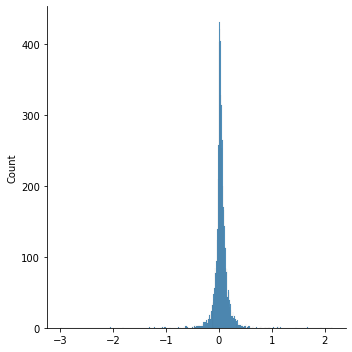

In [52]:
sns.displot(f1)

In [35]:
f1 = []
f3 = []
for i in final1:
    if min(i) >= 0:
        e1 = max(i)*0.50
        f3.append(e1)
    if min(i) < 0:
        if i[0] < 0 and (i[1]>= 0 or i[2] >= 0 or i[1] < 0 or i[2]<0):
            e2 = i[0]
            f1.append(e2)
        if i[0] < 0 and i[1] < 0 and (i[2] >= 0 or i[2]  <0  ):
            e5 = i[1]*0.1
            f3.append(e5)
        if (i[1] < 0) and (i[0] >= 0) and ( i[2]>= 0 or i[2] <=0):
            e3 = i[0] + (i[1]/2)
            f3.append(e3)
        if i[2] < 0 and (i[1]>= 0 and i[0] >= 0):
            e4 = i[1] + (i[2]/2)
            f3.append(e4)


In [36]:
c = 0
for i in f1:
    if i >0 :
        c +=1

In [49]:
len(f1)

6189

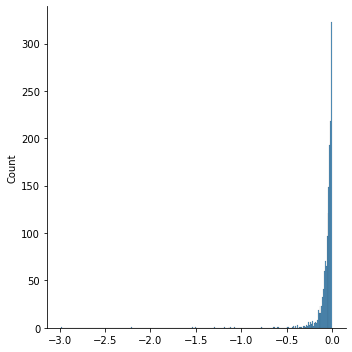

In [38]:
sns.displot(f1)

In [ ]:
f1 = pd.DataFrame(f1)
f1.to_csv("back_test_bull_final6.csv")